# Jumps Data Analysis
This Notebook is designed to perform analysis on single ions from single datasets. Most methods provide figures that help to display differences in behavior by different ions in the chain.

Datasets are selected using **choose_file.py** which automatically differentiates each ion by their previously identified locations. 

It pulls from both **Ion_functions.py** to do analysis on each of the ions.

In [1]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats
import scipy.stats
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
import math
import File_functions
plt.rcParams["figure.figsize"] = (3,3)



print (time.ctime())

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Thu Apr 22 10:09:14 2021


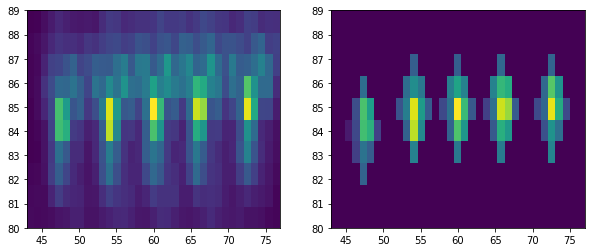

In [3]:
### Call the modules that have both the File information and the functions to perform the analysis ###
import Ion_functions as func
from Ion_functions import Ion
import choose_file 
choose_file.Jumps_5_350V_2() #file selection, plots ROI's to verify number and location of Ions. 

### Import Ion parameters. Run autothreshold finder and transition identification methods. 

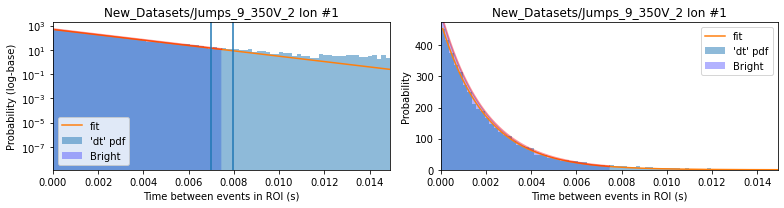

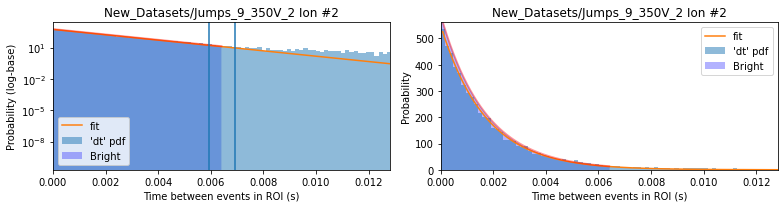

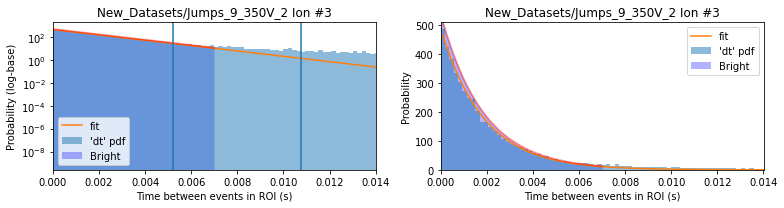

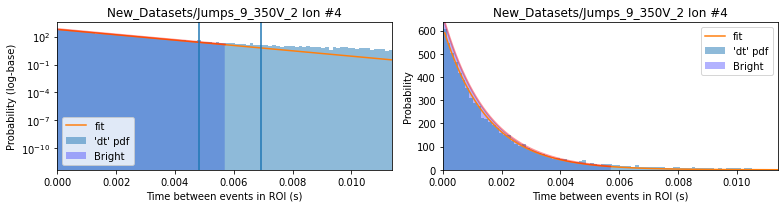

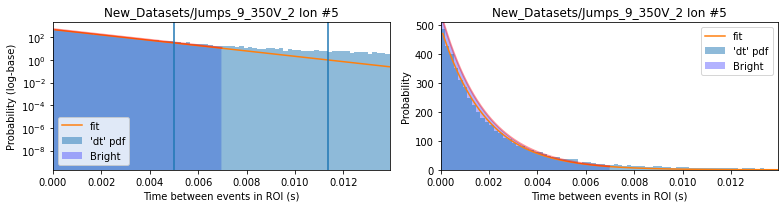

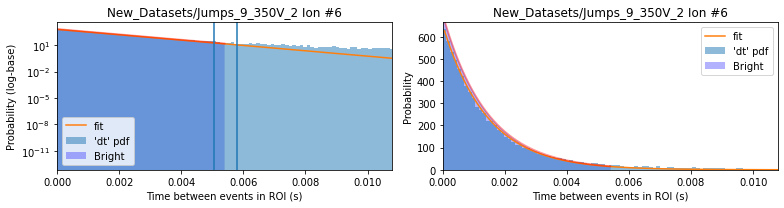

In [4]:
ion_1 = choose_file.ion_1
ion_2 = choose_file.ion_2
ion_3 = choose_file.ion_3
ion_4 = choose_file.ion_4
ion_5 = choose_file.ion_5
ion_6 = choose_file.ion_6
Ion_1 = choose_file.Ion_1
Ion_2 = choose_file.Ion_2
Ion_3 = choose_file.Ion_3
Ion_4 = choose_file.Ion_4
Ion_5 = choose_file.Ion_5
Ion_6 = choose_file.Ion_6


filename = choose_file.filename
old_data_table = choose_file.old_data_table
data_table = choose_file.data_table

sigma = 2
uncertainty = True
single_photon = False
ion_1.setup(sigma, uncertainty, single_photon)
ion_2.setup(sigma, uncertainty, single_photon)
ion_3.setup(sigma, uncertainty, single_photon)
ion_4.setup(sigma, uncertainty, single_photon)
ion_5.setup(sigma, uncertainty, single_photon)
ion_6.setup(sigma, uncertainty, single_photon)

In [4]:
ion_1.threshold

0.01030592771044444

In [7]:
# create an array to see distancing between ions
x_ = [ion_1.x,
ion_2.x,
ion_3.x,
ion_4.x,
ion_5.x,
ion_6.x]
x_

[35, 45, 0, 0, 0, 0]

In [8]:
# create an array to see that the y-values are essentially the same
y_ = [ion_1.y,
ion_2.y,
ion_3.y,
ion_4.y,
ion_5.y,
ion_6.y]
y_

[92, 92, 0, 0, 0, 0]

In [8]:
time = data_table['time'].max() - data_table['time'].min()
print(f'{len(ion_1.transpts)} transitions  ||  {len(ion_1.data)} photons  ||  {len(ion_1.data)/len(ion_1.transpts):.2f} photons/transition  ||  {len(ion_1.transpts)/time:.2f} transitions/second  ||  {len(ion_1.data)/time:.2f} photons/second')
print(f'{len(ion_2.transpts)} transitions  ||  {len(ion_2.data)} photons  ||  {len(ion_2.data)/len(ion_2.transpts):.2f} photons/transition  ||  {len(ion_2.transpts)/time:.2f} transitions/second  ||  {len(ion_2.data)/time:.2f} photons/second')
#print(f'{len(ion_3.transpts)} transitions  ||  {len(ion_3.data)} photons  ||  {len(ion_3.data)/len(ion_3.transpts):.2f} photons/transition  ||  {len(ion_3.transpts)/time:.2f} transitions/second  ||  {len(ion_3.data)/time:.2f} photons/second')
#print(f'{len(ion_4.transpts)} transitions  ||  {len(ion_4.data)} photons  ||  {len(ion_4.data)/len(ion_4.transpts):.2f} photons/transition  ||  {len(ion_4.transpts)/time:.2f} transitions/second  ||  {len(ion_4.data)/time:.2f} photons/second')
#print(f'{len(ion_5.transpts)} transitions  ||  {len(ion_5.data)} photons  ||  {len(ion_3.data)/len(ion_5.transpts):.2f} photons/transition  ||  {len(ion_5.transpts)/time:.2f} transitions/second  ||  {len(ion_5.data)/time:.2f} photons/second')
#print(f'{len(ion_6.transpts)} transitions  ||  {len(ion_6.data)} photons  ||  {len(ion_4.data)/len(ion_6.transpts):.2f} photons/transition  ||  {len(ion_6.transpts)/time:.2f} transitions/second  ||  {len(ion_6.data)/time:.2f} photons/second')

1804 transitions  ||  18228 photons  ||  10.10 photons/transition  ||  20.10 transitions/second  ||  203.14 photons/second
2208 transitions  ||  23566 photons  ||  10.67 photons/transition  ||  24.61 transitions/second  ||  262.63 photons/second


### Bright/Dark State lifetime analysis. 

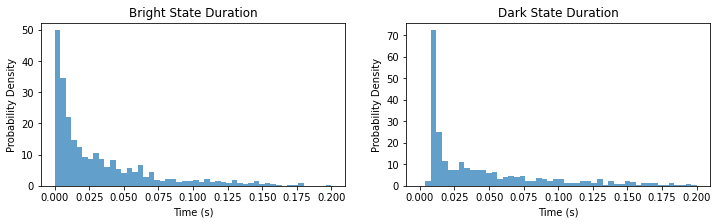

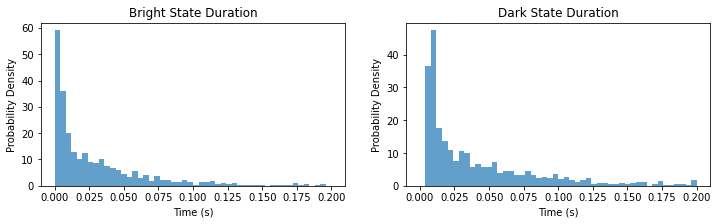

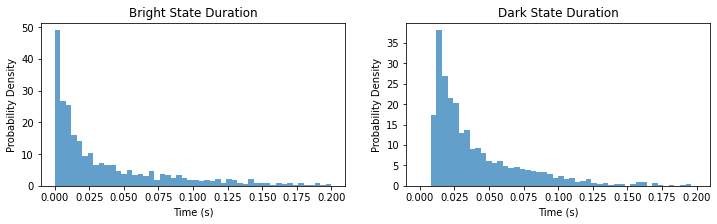

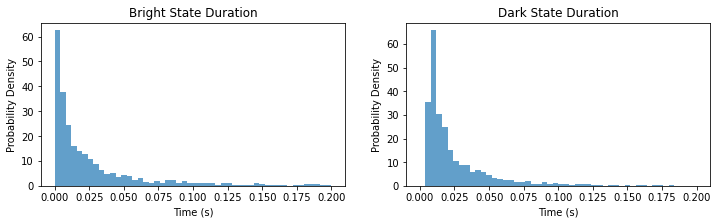

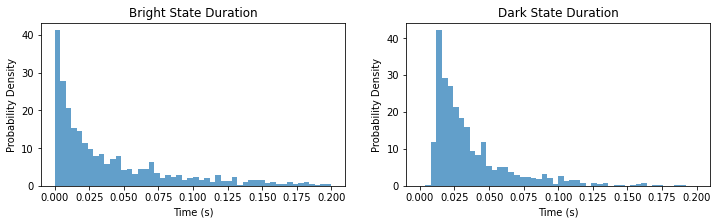

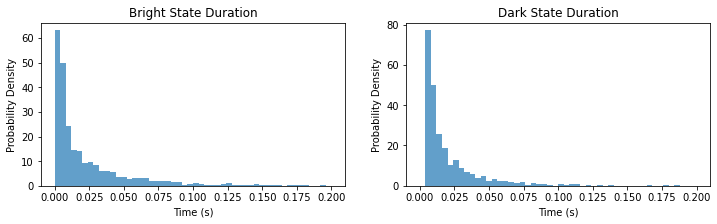

In [6]:
ion_1.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_2.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_3.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_4.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_5.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_6.duration_statistics(log = False)  ### Include log=True for a log base y-scale

### Proof of Transition Identification

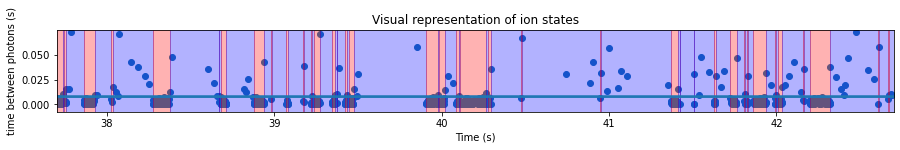

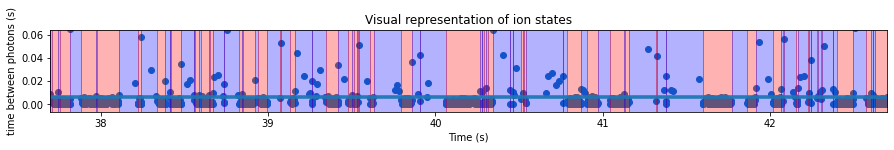

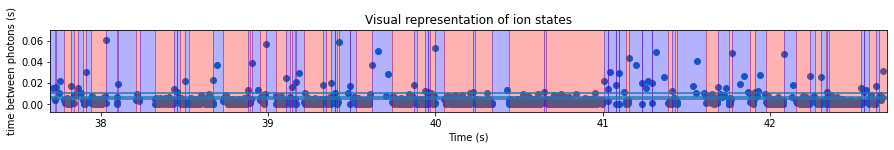

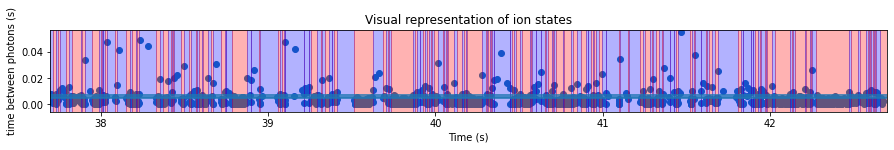

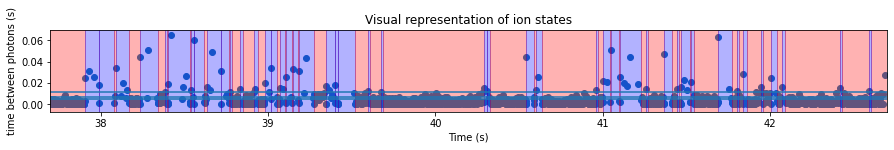

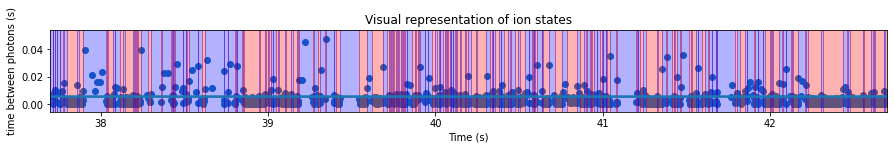

In [7]:
move = 40
start=data_table['time'].min()+move; duration=5
ion_1.visRange(start, duration)
ion_2.visRange(start, duration)
ion_3.visRange(start, duration)
ion_4.visRange(start, duration)
ion_5.visRange(start, duration)
ion_6.visRange(start, duration)

### Display the time between hits distribution for Bright/Dark States

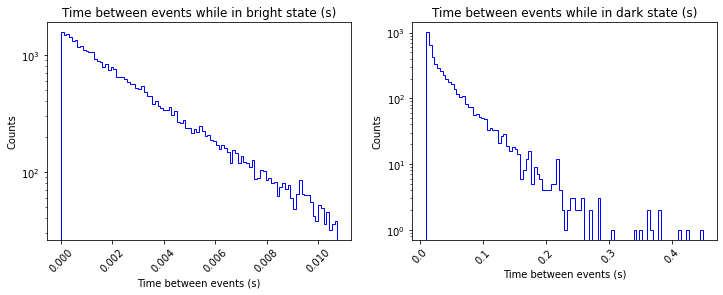

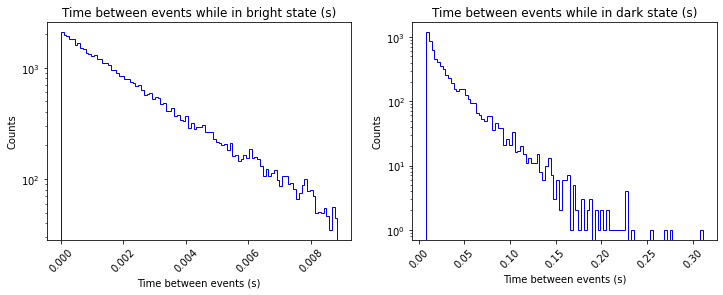

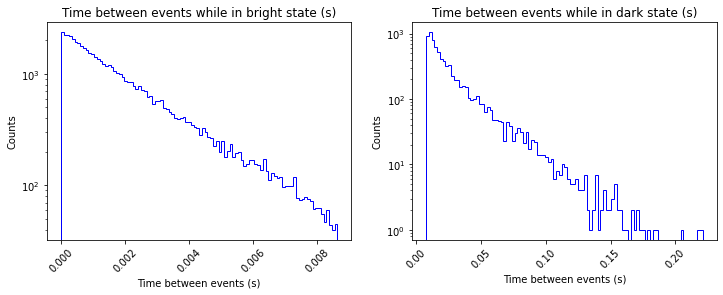

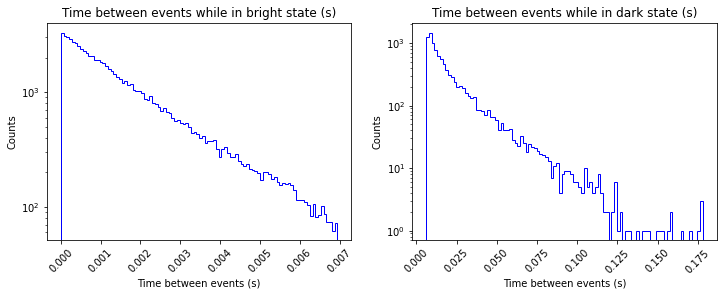

In [8]:
# No option 
ion_1.stateHistograms()
ion_2.stateHistograms()
ion_3.stateHistograms()
ion_4.stateHistograms()

### Display 'dt' value averages for the ___ number of photons before a transition. 

Averages: [ 74.87961628 166.24146772 100.21434313] 

Standard Deviation with No Alteration: 0.002323450248976553 

Average (unaltered) 0.002558128540642675 



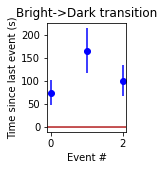

Averages: [168.61399967  97.07430857 222.72200112] 

Standard Deviation with No Alteration: 0.0019098361510333835 

Average (unaltered) 0.0021006789410975496 



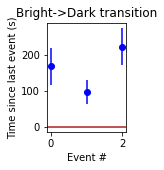

Averages: [357.22698927 464.37892905 581.13061986] 

Standard Deviation with No Alteration: 0.001836593444216741 

Average (unaltered) 0.0020009792811528553 



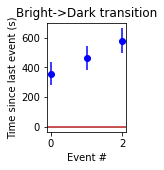

Averages: [732.25929864 608.91778994 951.07599142] 

Standard Deviation with No Alteration: 0.001493966948709589 

Average (unaltered) 0.0016243471354895533 



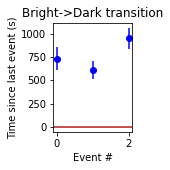

Averages: [2143.42635694 2438.18895028 3977.8197041 ] 

Standard Deviation with No Alteration: 0.002342345989828188 

Average (unaltered) 0.00233676069122528 



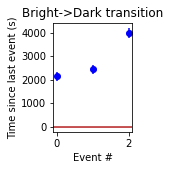

Averages: [609.70963643 519.80714367 844.25731428] 

Standard Deviation with No Alteration: 0.0013739977762772836 

Average (unaltered) 0.0015029982895876292 



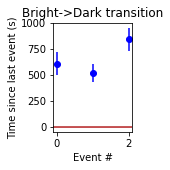

In [9]:
ion_1.leadup(3, setthresh=True)
ion_2.leadup(3, setthresh=True)
ion_3.leadup(3, setthresh=True)
ion_4.leadup(3, setthresh=True)
ion_5.leadup(3, setthresh=True)
ion_6.leadup(3, setthresh=True)
# setting the optional parameter setthresh in both dTimes() and leadup()␣
#,→ensures that counts
# above the threshold are excluded from bright state analysis in every step␣
#,→of the process

Text(0, 0.5, 'Transition Rate (1/s)')

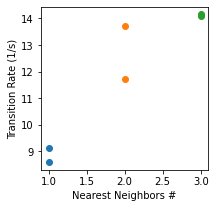

In [11]:
plt.scatter([1, 1], [len(ion_1.transpts)/data_table['time'].max(), len(ion_6.transpts)/data_table['time'].max()])
plt.scatter([2, 2], [len(ion_2.transpts)/data_table['time'].max(), len(ion_5.transpts)/data_table['time'].max()])
plt.scatter([3, 3], [len(ion_3.transpts)/data_table['time'].max(), len(ion_4.transpts)/data_table['time'].max()])
plt.xlabel('Nearest Neighbors #')
plt.ylabel('Transition Rate (1/s)')

In [ ]:
plt.scatter([4.86*3, 4.86*3], [len(ion_1.transpts)/data_table['time'].max(), len(ion_6.transpts)/data_table['time'].max()])
plt.scatter([4.86*2.2, 4.86*2.2], [len(ion_2.transpts)/data_table['time'].max(), len(ion_5.transpts)/data_table['time'].max()])
plt.scatter([4.86*1.8, 4.86*1.8], [len(ion_3.transpts)/data_table['time'].max(), len(ion_4.transpts)/data_table['time'].max()])
plt.xlabel('Average distance to all other ions')
plt.ylabel('Transition Rate (1/s)')

## TEST ZONE:

(array([1.000e+00, 1.843e+03, 3.150e+02, 1.730e+02, 1.230e+02, 9.700e+01,
        6.400e+01, 4.900e+01, 4.300e+01, 4.400e+01, 3.500e+01, 3.400e+01,
        2.800e+01, 3.000e+01, 2.600e+01, 1.900e+01, 2.900e+01, 1.000e+01,
        2.600e+01, 2.500e+01, 1.800e+01, 2.400e+01, 1.600e+01, 1.800e+01,
        1.800e+01, 1.500e+01, 1.300e+01, 1.500e+01, 1.600e+01, 1.900e+01,
        1.700e+01, 1.500e+01, 1.100e+01, 1.300e+01, 8.000e+00, 1.700e+01,
        8.000e+00, 1.200e+01, 2.000e+01, 1.000e+01, 9.000e+00, 1.400e+01,
        1.100e+01, 7.000e+00, 9.000e+00, 8.000e+00, 5.000e+00, 6.000e+00,
        8.000e+00, 1.300e+01, 9.000e+00, 6.000e+00, 6.000e+00, 7.000e+00,
        9.000e+00, 4.000e+00, 8.000e+00, 8.000e+00, 5.000e+00, 7.000e+00,
        9.000e+00, 1.400e+01, 6.000e+00, 9.000e+00, 8.000e+00, 3.000e+00,
        8.000e+00, 1.300e+01, 3.000e+00, 7.000e+00, 8.000e+00, 8.000e+00,
        4.000e+00, 3.000e+00, 5.000e+00, 6.000e+00, 4.000e+00, 6.000e+00,
        8.000e+00, 3.000e+00, 1.000e+0

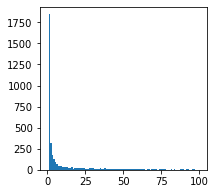

In [11]:
photon_counts = [0]
for i in range(len(ion_1.transpts)-1):
    photon_counts.append(ion_1.transpts[i+1] - ion_1.transpts[i])
plt.hist(photon_counts, bins = 101, range = (0,100))


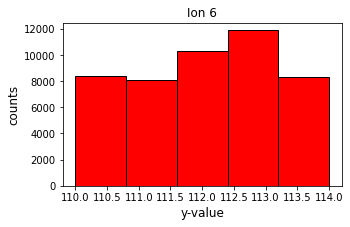

112.49305946693374 0.36393039352388606


In [18]:
ion_6.yhistogram(9)

## FLORESENCE:

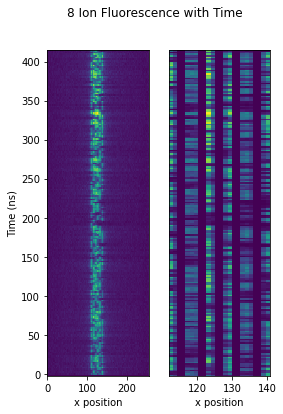

In [13]:
used_data = (data_table
             #.query("2.685e11 < time < 2.705e11")
            )
old_data = (old_data_table
             #.query("2.685e11 < time < 2.705e11")
            )
    
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(4,6))
fig.suptitle('8 Ion Fluorescence with Time')
h = ax0.hist2d(old_data['x'], old_data['time'], bins = [256, 200])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')
#ax0.set_ylim(0, 55)
#ax0.colorbar(h[3])
h = ax1.hist2d(used_data['x'], used_data['time'], bins = [24, 200])
#ax1.set_xlim(x1-5,x1+5)
ax1.set_xlabel('x position')
ax1.set_ylabel('Time (s)')
#ax1.set_ylim(0, 55)
ax1.yaxis.set_visible(False)


Text(0.5, 1.0, '350V 6 ions')

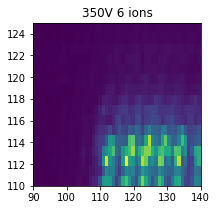

In [14]:
plt.hist2d(old_data_table['x'], old_data_table['y'], range = ([90,140], [110,125]), bins = (51, 16))
plt.title('350V 6 ions')

Text(0.5, 1.0, '350V 6 ions')

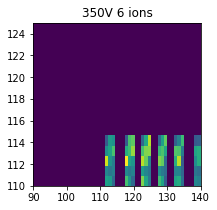

In [15]:
plt.hist2d(data_table['x'], data_table['y'], range = ([90,140], [110,125]), bins = (51, 16))
plt.title('350V 6 ions')

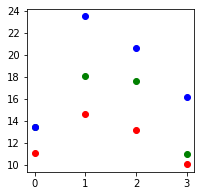

In [19]:
low = [11.09,  14.57,  13.17,  10.02]
med = [13.45, 18.07, 17.58, 10.95]
high = [13.39, 23.54, 20.62, 16.18]
plt.plot(low, 'r', marker = 'o', label = '8.7 micron separation', lw = 0)
plt.plot(med, 'g', marker = 'o', label = '6.9 micron separation', lw = 0)
plt.plot(high, 'b', marker = 'o', label = '6.3 micron separation', lw = 0)


# SVG Saving

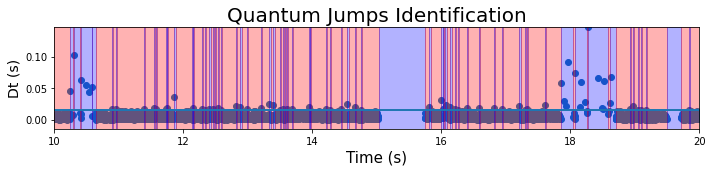

In [27]:
it = ion_1
# plots a small slice of data 
# and uses red/blue color coding to distinguish between the bright and dark state
# useful for visualizing the effects of different sorting methods
start = 10
end = start+duration
use = it.data.query(f'{start} <= time < {end}')
index = np.arange(int(min(use['index'])), int(max(use['index'])))
change = use['dt']
linehere = []
for j in index:
    if j in it.transpts:
        linehere.append(j)
plt.figure(figsize=(10, 2.5))
counting = use['time']
plt.scatter(counting, change)
plt.title("Quantum Jumps Identification", fontsize = 20)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Dt (s)", fontsize = 14)
plt.ylim(-it.threshold,10*it.threshold)

if linehere != []:
            
    if index[0] in it.dark['index']:
        if index[0] in it.transpts:
            plt.axvspan(it.data.at[index[0], 'time'], it.data.at[linehere[0], 'time'], alpha=0.3, color='blue')
            plt.axvspan(start, it.data.at[index[0], 'time'], alpha=0.3, color='red')
        else:
            plt.axvspan(start, it.data.at[linehere[0], 'time'], alpha=0.3, color='blue')
    if index[0] in it.bright['index']:
        if index[0] in it.transpts:
            plt.axvspan(it.data.at[index[0], 'time'], it.data.at[linehere[0], 'time'], alpha=0.3, color='red')
            plt.axvspan(start, it.data.at[index[0], 'time'], alpha=0.3, color='blue')
        else:
            plt.axvspan(start, it.data.at[linehere[0], 'time'], alpha=0.3, color='red')

    if index[-1] in it.bright['index']:            
        plt.axvspan(it.data.at[linehere[-1], 'time'], end, alpha=0.3, color='red')
    if index[-1] in it.dark['index']:
        plt.axvspan(it.data.at[linehere[-1], 'time'], end, alpha=0.3, color='blue')
                
    for i in range(len(linehere)):
        plt.axvline(x=linehere[i])
    for i in range(len(linehere) - 1):
        if linehere[i] in it.DtB:
            plt.axvspan(it.data.at[linehere[i], 'time'], it.data.at[linehere[i+1], 'time'], alpha=0.3, color='red')
        if linehere[i] in it.BtD:
            plt.axvspan(it.data.at[linehere[i], 'time'], it.data.at[linehere[i+1], 'time'], alpha=0.3, color='blue')
            
            
if linehere == []:
    if len(use) == (0 or 1):
        print(f'Ion {it.n} had {len(use)} hits during this time')
        plt.axvspan(start, end, alpha=0.3, color='blue')
    else:
        if index[0] in it.dark['index']:
            plt.axvspan(it.data.at[index[0], 'time'], it.data.at[index[-1], 'time'], alpha=0.3, color='blue')
        else:
            plt.axvspan(it.data.at[index[0], 'time'], it.data.at[index[-1], 'time'], alpha=0.3, color='red')
    plt.axvspan(it.data.at[index[-1], 'time'], end, alpha=0.3, color='blue')
    plt.axvspan(start, it.data.at[index[0], 'time'], alpha=0.3, color='blue')
            
plt.xlim(start,end) 
plt.axhline(it.threshold)
plt.axhline(it.lower_limit)
plt.axhline(it.upper_limit)
plt.tight_layout()
plt.savefig('Jumps.svg')

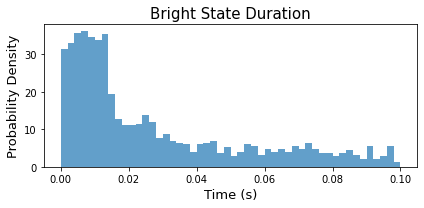

In [44]:
it = ion_1
# Transition points determined in Ion_functions.setup() 
# Append the length between state transitions to the corresponding state the ion was in. 
log = False
Bduration = []
Dduration = []
for i in range(0, len(it.BtD)-1):    #This just decides which state the function should start in. 
                                                #If the first transition is DtB then the first length is in the dark state.
    if it.BtD[0] < it.DtB[0]:
        Dduration.append(it.data.at[it.transpts[2*i+1], 'time'] - it.data.at[it.transpts[2*i], 'time'])
        Bduration.append(it.data.at[it.transpts[2*i+2], 'time'] - it.data.at[it.transpts[2*i+1], 'time'])
    else:
        Bduration.append(it.transpts[2*i+1] - it.transpts[2*i])
        Dduration.append(it.transpts[2*i+2] - it.transpts[2*i+1])

# Plot the histogram of Bright state duration times along with its exponential fit. 
fig, (ax1) = plt.subplots(1, figsize = (6, 3))
bin_heights, bin_borders, _ = ax1.hist(Bduration, bins= 50, alpha = .7, label='\'dt\' pdf', range = [0,.1], density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
#popt, pcov = scipy.optimize.curve_fit(Superradiance, bin_centers, bin_heights, p0 = [15, 1.5])
#popt, _ = curve_fit(expon, bin_centers, bin_heights, p0=[1/.02, 20])
#print(f'Decay parameter: {1/popt[0]:.4f} (s)')
#x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
#ax1.plot(x_interval_for_fit, expon(x_interval_for_fit, *popt), label='fit')
#ax1.plot(x_interval_for_fit, Superradiance(x_interval_for_fit, *popt), label='fit')
ax1.set_xlabel('Time (s)', fontsize = 13)
ax1.set_title('Bright State Duration', fontsize = 15)
if log==False:
    ax1.set_ylabel('Probability Density', fontsize = 13)
else:
    ax1.set_yscale('log')
    ax1.set_ylabel('Probability Density (log base)')
            
# Plot the histogram of Dark state duration times along with its exponential fit. 
bin_heights, bin_borders, _ = ax2.hist(Dduration, bins= 50, alpha = .7, label='\'dt\' pdf', range = [0,.1], density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
bin_centers = np.array(bin_centers)
bin_heights = np.array(bin_heights)
centers = []
heights = []
for i in range(len(bin_centers)):
    centers.append(bin_centers[i])
    heights.append(bin_heights[i])
index = []
for i in range(len(centers)):
    if centers[1] < it.threshold:
        centers.pop(1)
        heights.pop(1)
bin_centers = centers
bin_heights = heights
                
#popt, _ = curve_fit(expon, bin_centers, bin_heights, p0=[1/.02, 20])
#print(f'Decay parameter: {1/popt[0]:.4f} (s)')
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
#ax2.plot(x_interval_for_fit, expon(x_interval_for_fit, *popt), label='fit')
#ax2.set_xlabel('Time (s)', fontsize = 13)
#ax2.set_title('Dark State Duration', fontsize = 15)
#if log==False:
#    ax2.set_ylabel('Probability Density', fontsize = 13)
#else:
#    ax2.set_yscale('log')
#    ax2.set_ylabel('Probability Density (log base)')
fig.tight_layout()
fig.savefig('Bright_State_Duration.svg')